### Mini Project - Rakamin Academy

## Investigate Hotel Business using Data Visualization

-------------------

## Introduction

**Background**

Sangat penting bagi suatu perusahaan untuk selalu menganalisa performa bisnisnya. Pada kesempatan kali ini, saya akan lebih mendalami bisnis dalam bidang perhotelan. Fokus yang saya tuju adalah untuk mengetahui bagaimana perilaku pelanggan hotel dalam melakukan pemesanan hotel, dan hubungannya terhadap tingkat pembatalan pemesanan hotel. Hasil dari insight yang saya temukan akan saya sajikan dalam bentuk data visualisasi agar lebih mudah dipahami dan bersifat lebih persuasif.

## 1. Import Library

In [2]:
## Basic Library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset

In [3]:
df = pd.read_csv('hotel_bookings_data.csv')

df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
47729,City Hotel,1,49,2018,May,10,1,0,5,2,...,0,No Deposit,8.0,NaN,0,Personal,76.33,0,0,Canceled
102823,City Hotel,0,19,2018,February,49,3,2,2,2,...,0,No Deposit,9.0,NaN,0,Personal,89.89,0,1,Check-Out
100448,City Hotel,0,62,2018,December,44,25,0,3,2,...,0,No Deposit,9.0,NaN,0,Personal,111.60,0,1,Check-Out
14509,Resort Hotel,0,0,2017,January,47,19,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,38.00,0,0,Check-Out
66233,City Hotel,1,87,2019,June,15,15,2,2,2,...,0,Non Refund,1.0,NaN,0,Personal,95.00,0,0,Canceled


## 3. Exploratory Data Analysis

#### 3.1 Cek Jumlah row dan column pada dataset

In [4]:
df.shape

(119390, 29)

In [6]:
print('Jumlah row: ', df.shape[0])
print('Jumlah kolom: ', df.shape[1])

Jumlah row:  119390
Jumlah kolom:  29


#### 3.2 Cek informasi dasar pada dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### 3.3 Check value pada setiap feature

In [22]:
for col in df.columns:
    print("{} Terdapat {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64' or df[col].dtypes == 'object':
        print("{} values: {}".format(col, df[col].unique()))
        print('_' * 100)

hotel Terdapat 2 unique values: object
hotel values: ['Resort Hotel' 'City Hotel']
____________________________________________________________________________________________________
is_canceled Terdapat 2 unique values: int64
is_canceled values: [0 1]
____________________________________________________________________________________________________
lead_time Terdapat 479 unique values: int64
lead_time values: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124

**Result**
- Terdapat value **'Undefined'** pada **feature meal**, **market_segment**, **distribution_meal**. Perlu dilakukan analisis lebih lanjut apakah value tersebut perlu dihandling atau tidak.

#### 3.4 Check Missing Values

In [11]:
missing_values = df.isnull().sum()*100 / len(df)
print(round(missing_values,5).sort_values(ascending=False))

company                           94.30689
agent                             13.68624
city                               0.40874
children                           0.00335
hotel                              0.00000
is_repeated_guest                  0.00000
total_of_special_requests          0.00000
required_car_parking_spaces        0.00000
adr                                0.00000
customer_type                      0.00000
days_in_waiting_list               0.00000
deposit_type                       0.00000
booking_changes                    0.00000
previous_bookings_not_canceled     0.00000
previous_cancellations             0.00000
market_segment                     0.00000
distribution_channel               0.00000
is_canceled                        0.00000
meal                               0.00000
babies                             0.00000
adults                             0.00000
stays_in_weekdays_nights           0.00000
stays_in_weekend_nights            0.00000
arrival_dat

**result**
- Terdapat missing/null values pada feature **company**, **agent**, **city**, **children**
- Akan dilakukan imputasi untuk feature yang terdapat missing/null values

#### 3.5 Check duplicated data

In [ ]:
df.duplicated().any()

True

In [14]:
df.duplicated().sum()

33261

**result**
- Terdapat nulai duplicated pada dataset
- Akan dilakukan drop untuk nilai duplicated dan akan menyisakan unique values

#### 3.6 Descriptive Statistics - Numerikal

In [28]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.37,0.48,0.00,0.00,0.00,1.0,1.0
lead_time,119390.0,104.01,106.86,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119390.0,2018.16,0.71,2017.00,2018.00,2018.00,2019.0,2019.0
arrival_date_week_number,119390.0,27.17,13.61,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119390.0,15.80,8.78,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119390.0,0.93,1.00,0.00,0.00,1.00,2.0,19.0
stays_in_weekdays_nights,119390.0,2.50,1.91,0.00,1.00,2.00,3.0,50.0
adults,119390.0,1.86,0.58,0.00,2.00,2.00,2.0,55.0
children,119386.0,0.10,0.40,0.00,0.00,0.00,0.0,10.0
babies,119390.0,0.01,0.10,0.00,0.00,0.00,0.0,10.0


**Result**
- feature **lead_time**, **agent** jika dilihat mean dan mediannya menunjukkan datanya skewed
- feature **adr** nilai minimalnya minus(-) terdapat value negatif. untuk feature ini perlu di analisis lebih lanjut

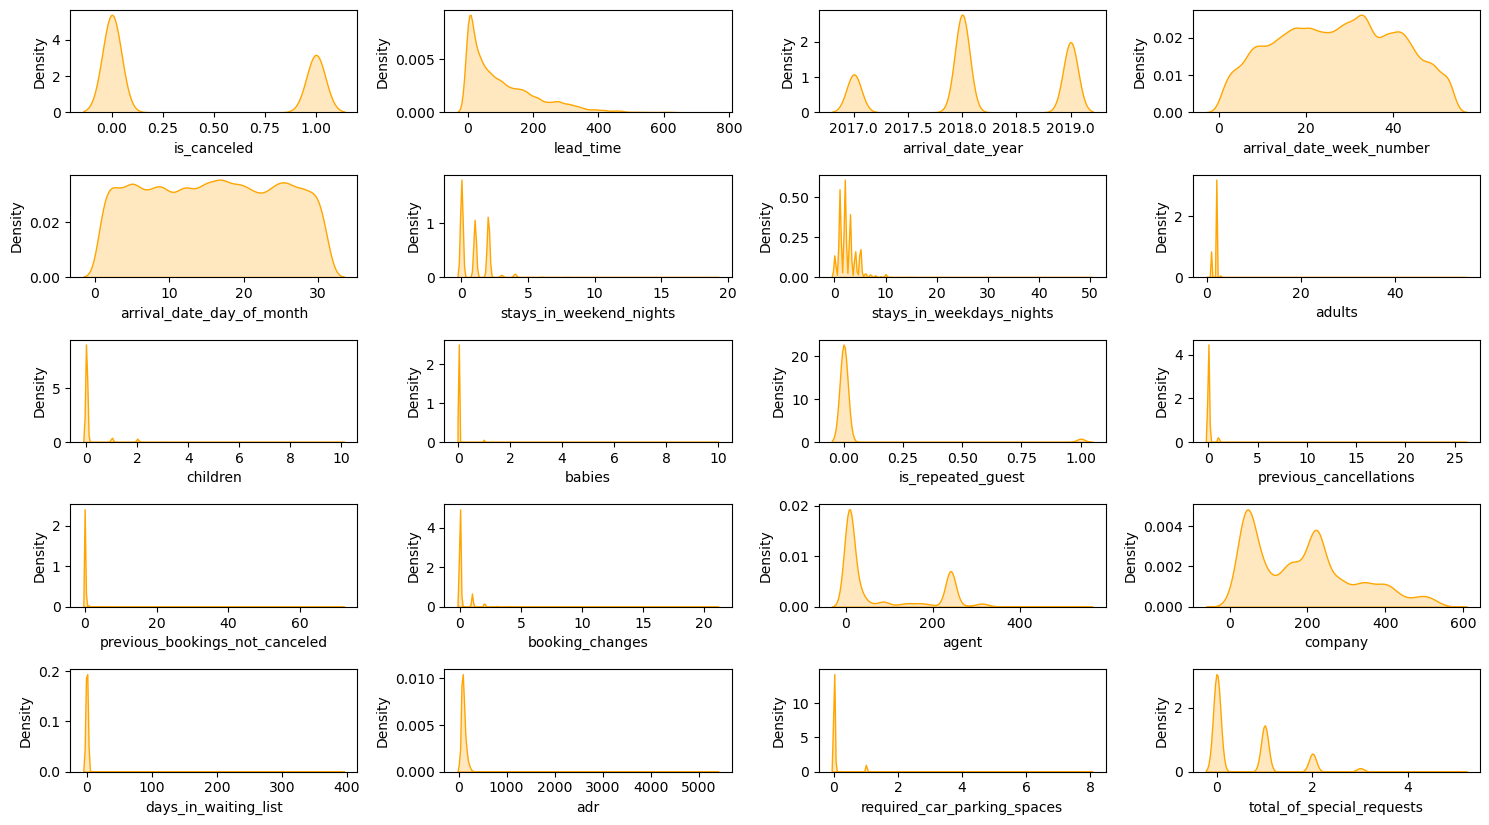

In [38]:
## Cek distribusi feature numerical menggunakan displot
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()

plt.figure(figsize=(15,10))
for i in range (0, len(nums)):
    plt.subplot(6, 4, i+5)
    sns.kdeplot(x=df[nums[i]], color='orange', shade=True)
    plt.xlabel(nums[i])
    plt.tight_layout()

**result**
- Secara keseluruhan jika dilihat melalui visualisasi feature numerical cenderung positif skewd
- Feature **arrival_date_week_number**, **arrival_date_day_of_month** memiliki distribusi normal

#### 3.7 Descriptive Statistics - Categorical

In [40]:
df.describe(exclude=np.number).round(2).T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


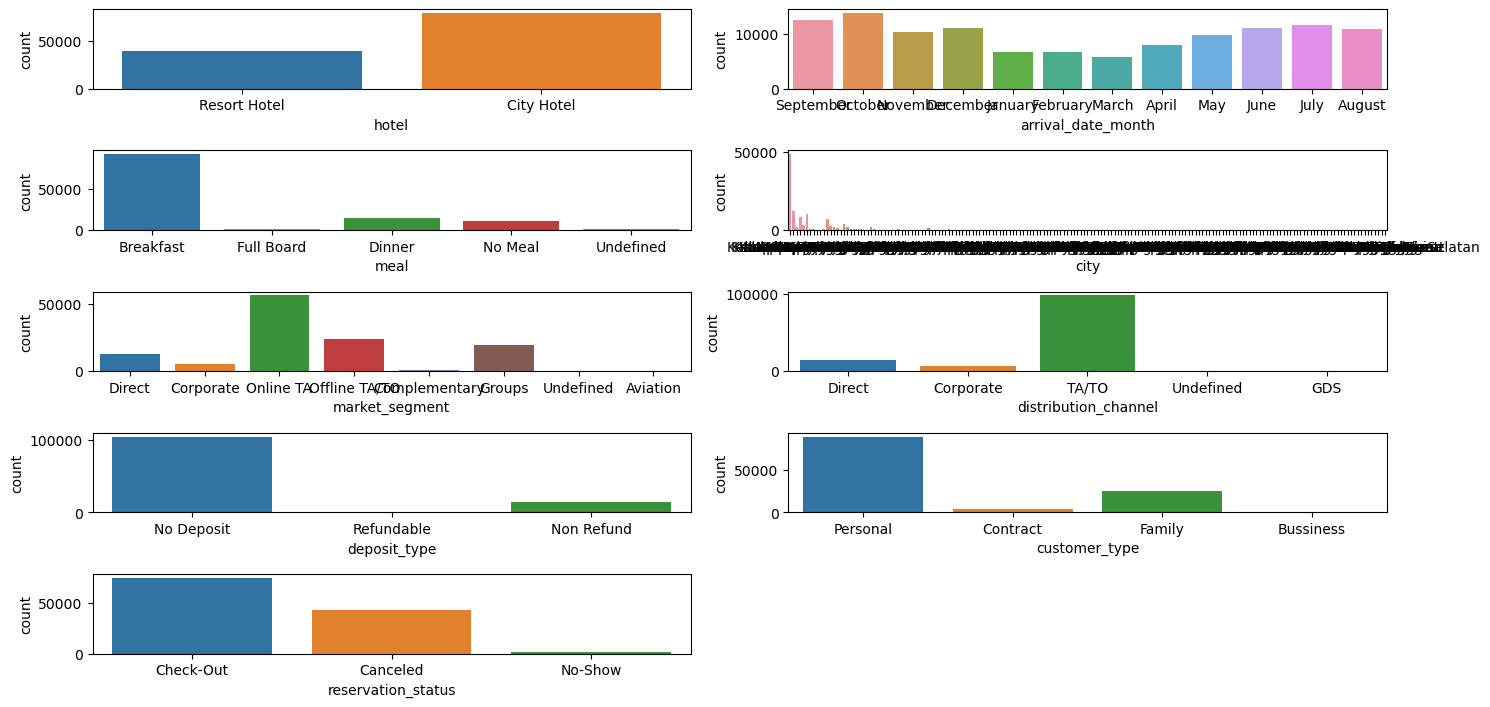

In [47]:
## Cek distribusi feature categorical menggunakan displot
cats = df.loc[:, (df.dtypes == object)].columns.tolist()

plt.figure(figsize=(15,10))
for i in range(0, len(cats)):
    plt.subplot(7, 2, i+5)
    sns.countplot(x=df[cats[i]])
    plt.tight_layout()

## 4. Data Cleansing

In [52]:
df_clean = df.copy()

In [53]:
missing_values = df_clean.isnull().sum()*100 / len(df)
print(round(missing_values,5).sort_values(ascending=False))

company                           94.30689
agent                             13.68624
city                               0.40874
children                           0.00335
hotel                              0.00000
is_repeated_guest                  0.00000
total_of_special_requests          0.00000
required_car_parking_spaces        0.00000
adr                                0.00000
customer_type                      0.00000
days_in_waiting_list               0.00000
deposit_type                       0.00000
booking_changes                    0.00000
previous_bookings_not_canceled     0.00000
previous_cancellations             0.00000
market_segment                     0.00000
distribution_channel               0.00000
is_canceled                        0.00000
meal                               0.00000
babies                             0.00000
adults                             0.00000
stays_in_weekdays_nights           0.00000
stays_in_weekend_nights            0.00000
arrival_dat

#### 4.1 Handling null values
- company = null values diganti ke **0**, yang berarti tamu tidak berasal dari company
- agent = null values diganti ke **0**, yang berarti tamu melakukan reservasi mandiri bukan dari agent
- children = null values diganti ke **0**, yang berarti tamu tidak membawa anak2
- city = null values diganti ke **unknown**, yang berarti kota tidak diketahui secara pasti

In [54]:
# company, agent, children
feature_null = ['company', 'agent', 'children']
for col in feature_null:
    df_clean[col].fillna(0, inplace=True)
    
# city
df_clean['city'].fillna('unknown', inplace=True)

In [56]:
df_clean.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

#### 4.2 Handling error values
- meal = terdapat value undefined dimasukkan ke category **No Meal**
- children = tipe datanya diubah ke int64

In [57]:
## Feature meal
df_clean['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

In [58]:
df_clean['meal'].replace('Undefined', 'No Meal', inplace=True)
df_clean['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

In [63]:
## Feature children
df_clean['children'] = df_clean['children'].astype('int64')
df_clean[['children', 'adults', 'babies']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   children  119390 non-null  int64
 1   adults    119390 non-null  int64
 2   babies    119390 non-null  int64
dtypes: int64(3)
memory usage: 2.7 MB


#### 4.3 Drop data yang tidak perlu

In [70]:
## data dengan 0
df_clean['total_guest'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']
print('Data dengan 0 tamu: {0} dari {1} dari semua data'.format(df_clean[df_clean['total_guest'] == 0].shape[0], df_clean.shape[0]))

Data dengan 0 tamu: 180 dari 119390 dari semua data


In [71]:
df_clean_fix = df_clean[(df_clean['total_guest'] > 0)]
print('Before preprocessing', df_clean.shape[0])
print('After preprocessing', df_clean_fix.shape[0])

Before preprocessing 119390
After preprocessing 119210


In [72]:
df_final = df_clean_fix.copy()